# Online Payment Fraud Detection
Author: [Mohd Mudassir Ansari](https://www.linkedin.com/in/mudassir-ia/)
## About Data:
Dataset: ([Kaggle-Online Payment Fraud Detection Dataset](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data))

The below column reference:

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

## Reading the Data

In [22]:
# importing important data science libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# reading data
data = pd.read_csv('../data/online-payment-fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
# basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682239 entries, 0 to 682238
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            682239 non-null  int64  
 1   type            682239 non-null  object 
 2   amount          682239 non-null  float64
 3   nameOrig        682239 non-null  object 
 4   oldbalanceOrg   682239 non-null  float64
 5   newbalanceOrig  682239 non-null  float64
 6   nameDest        682239 non-null  object 
 7   oldbalanceDest  682239 non-null  float64
 8   newbalanceDest  682239 non-null  float64
 9   isFraud         682239 non-null  int64  
 10  isFlaggedFraud  682239 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 57.3+ MB


## Numeric Values

In [25]:
numeric_features = [x for x in data.columns if data[x].dtype != 'object']
numeric_features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

## Correlation between Features

Checking the relation among the features i.e how one or more variables are related to each other

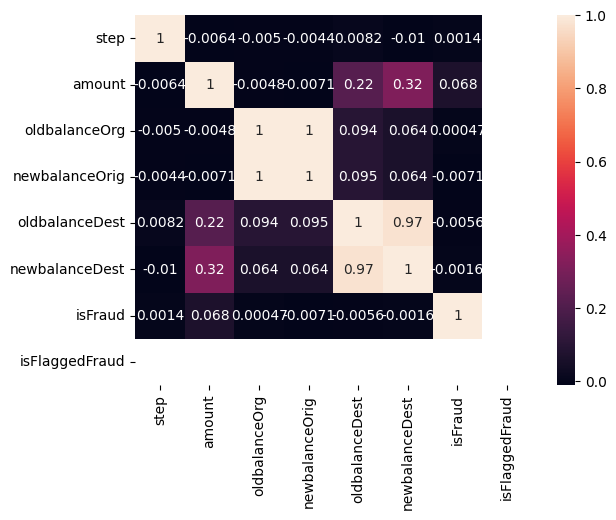

In [26]:
sns.heatmap(data[numeric_features].corr(), annot=True)
plt.show()

## Categorical Values

In [27]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## Distribution of transaction type

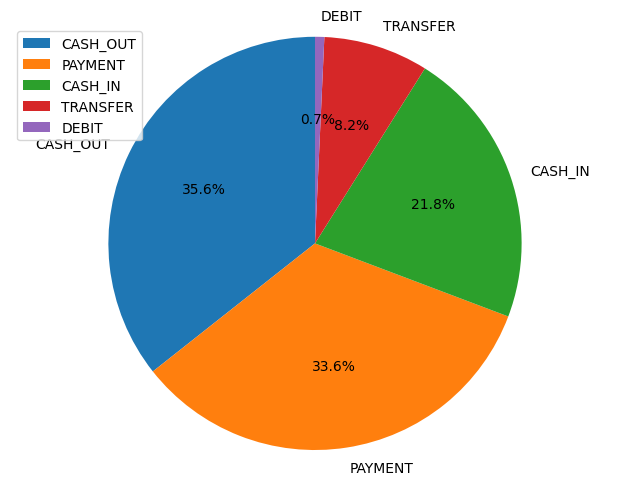

In [28]:
transaction_type = data.type.value_counts()
transaction = transaction_type.index
quantity = transaction_type.values

plt.pie(quantity, labels=transaction, autopct='%.1f%%', startangle=90)
plt.legend(transaction, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Converting categorical data to numerical values

In [29]:
# type of transaction: ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
# alphabetically assigning all values a number from 0 to 4

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Splitting Training and Test data

In [30]:
from sklearn.model_selection import train_test_split

X = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
print(X_train.shape, y_train.shape)

(614015, 4) (614015,)


In [32]:
print(X_test.shape, y_test.shape)

(68224, 4) (68224,)


## Standardization

Standardizing the data so for improving scores and a good prediction

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

Since, this is a Binary Classification problem (Fraud: 1, Not Fraud: 0), we will first try the 
### Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

In [35]:
np.unique(y_pred)

array([0, 1], dtype=int64)

## Accuracy of Model

Accuracy of Logistic Regression Model is evaluated with the help of Confusion Matrix and Classification Report  
The Accuracy Score basically indicates the overall accuracy of the trained model

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def accuracy_report(y_test, y_pred):
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

accuracy_report(y_test, y_pred)

Confusion Matrix:
[[68178     3]
 [   37     6]]

Accuracy: 0.9994136960600375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68181
           1       0.67      0.14      0.23        43

    accuracy                           1.00     68224
   macro avg       0.83      0.57      0.62     68224
weighted avg       1.00      1.00      1.00     68224




In [37]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,9839.64,170136.0,160296.36
1,3,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,1,181.00,181.0,0.00
4,3,11668.14,41554.0,29885.86


In [38]:
regressor.predict([[4, 9839, 170136, 0]])

array([1], dtype=int64)

Since, the data is very large. The Logistic Regression model gives Overfitting.  
Hence we will next try using:
### Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# prediction
y_pred = treeclassifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# Accuracy
def accuracy_report(y_test, y_pred):
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

accuracy_report(y_test, y_pred)

Confusion Matrix:
[[68164    17]
 [   20    23]]

Accuracy: 0.9994576688555347

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68181
           1       0.57      0.53      0.55        43

    accuracy                           1.00     68224
   macro avg       0.79      0.77      0.78     68224
weighted avg       1.00      1.00      1.00     68224




Since the Accuracy of Decision Tree model is slightly more than the Logistic Regression, we will choose this one

## Pickling

converting models into a byte stream. This byte stream can then be stored in a file, transmitted over a network, or stored in memory

In [42]:
import pickle

# pickle.dump(scaler, open('../models/scaler.pkl', 'wb'))
pickle.dump(treeclassifier, open('../models/treeclassifier.pkl', 'wb'))